In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/dataset/archive (5).zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
from glob import glob
from keras.models import Sequential
from keras.layers import BatchNormalization,MaxPooling2D,Dense,Conv2D,Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

import warnings
from tqdm import tqdm
from PIL import Image
warnings.filterwarnings('ignore')

In [ ]:
df=pd.DataFrame(columns=['image','label'])

In [ ]:
# for a picture containing image of vehicle label is 1.

idx=0
for name in tqdm(glob('../content/data/vehicles/*')):
    image=Image.open(name)
    img_seq=image.getdata()
    img=np.array(img_seq)
    img=np.reshape(img,(64,64,3))
    data=pd.DataFrame({'image':[img],'label':[1]},index=[idx])
    df=df.append(data)
    idx+=1

100%|██████████| 8792/8792 [00:34<00:00, 256.24it/s]


In [ ]:
# for a picture doesn't contain image of vehicle label is 0.

for name in tqdm(glob('..//content/data/non-vehicles/*')):
    image=Image.open(name)
    img_seq=image.getdata()
    img=np.array(img_seq)
    img=np.reshape(img,(64,64,3))
    data=pd.DataFrame({'image':[img],'label':[0]},index=[idx])
    df=df.append(data)
    idx+=1

100%|██████████| 8968/8968 [00:36<00:00, 247.46it/s]


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
split=StratifiedShuffleSplit(n_splits=1,test_size=0.15,random_state=42)
for train_index,test_index in split.split(df,df['label']):
    train_data=df.iloc[train_index]
    test_data=df.iloc[test_index]
# train_x,test_x,train_y,test_y=train_test_split(df['image'],df['label'],random_state=42,test_size=0.15)

In [ ]:
train_img,train_label=train_data['image'],train_data['label']
test_img,test_label=test_data['image'],test_data['label']

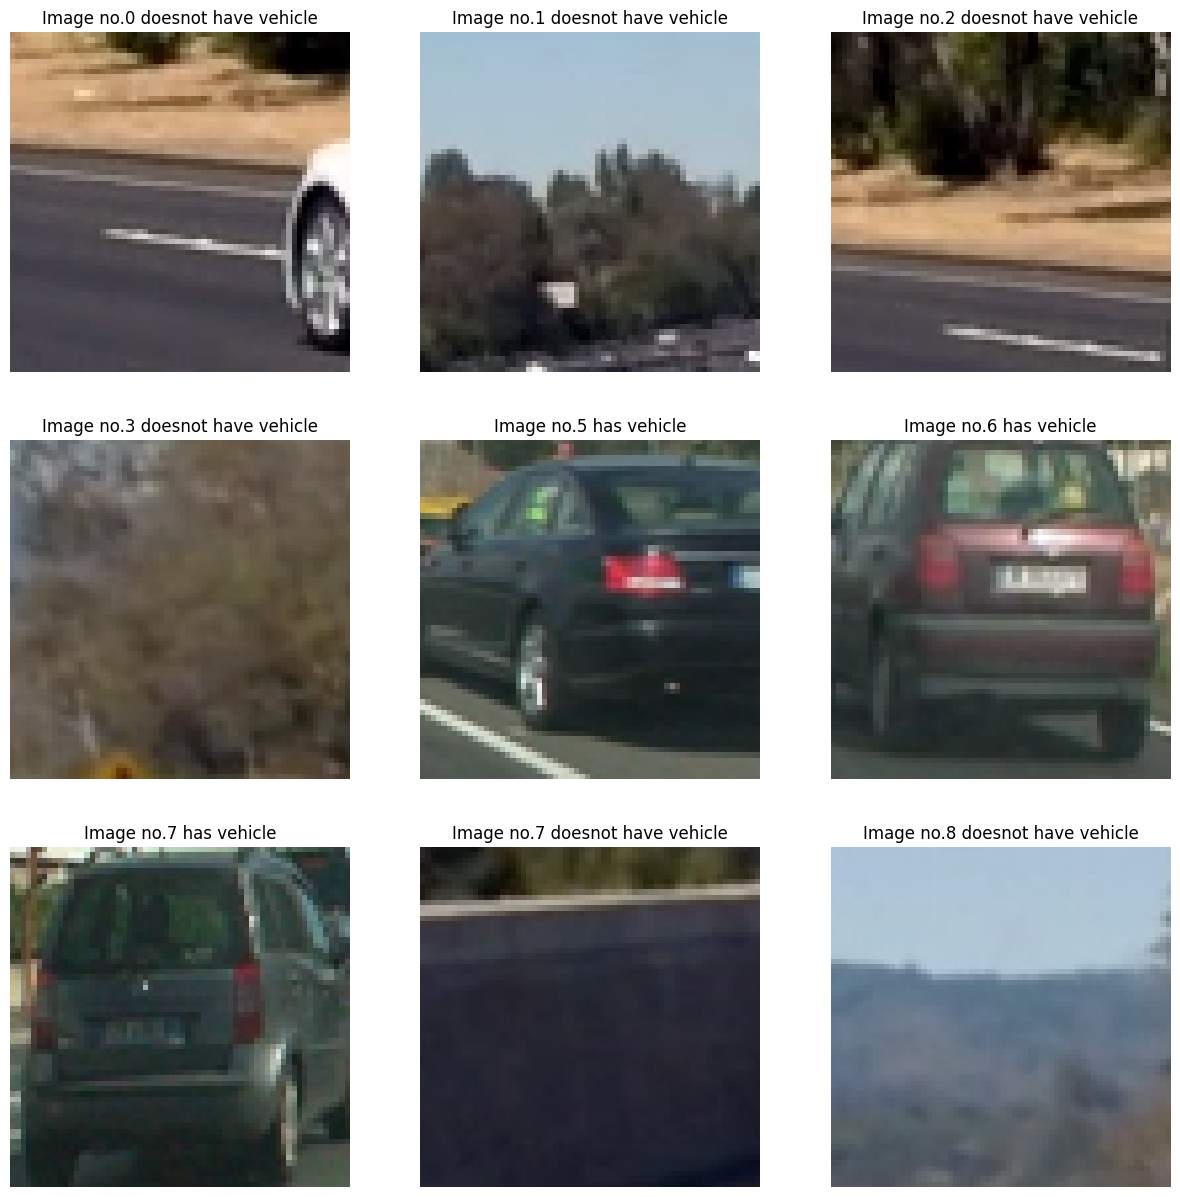

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,(i%9)+1)
    ix=np.random.randint(3000)
    if(train_label.iloc[ix]==1):
        plt.title('Image no.{0} has vehicle'.format(i+1))
    elif(train_label.iloc[ix]==0):
        plt.title('Image no.{0} doesnot have vehicle'.format(i))
    plt.axis('off')
    plt.imshow(train_img.iloc[ix])
plt.show()

In [ ]:
def change_image_dimension(data):
    data=np.reshape(data.to_list(),(len(data),64,64,3))
    return data

In [ ]:
train_img=change_image_dimension(train_img)
test_img=change_image_dimension(test_img)
# train_img
train_img=train_img/255.0
test_img=test_img/255.0

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10
    width_shift_range=0.1
    height_shift_range=0.1
    shear_range=0.2
    zoom_range=0.2
    horizontal_flip=True
    vertical_flip=False
)

In [ ]:
train_label=np.array(train_label,dtype=int)
test_label=np.array(test_label,dtype=int)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the model
r=model.fit(train_img,train_label,validation_data=(test_img,test_label),epochs=100,batch_size=32,)

Epoch 1/100
472/472 [==============================] - 21s 15ms/step - loss: 0.2321 - accuracy: 0.9028 - val_loss: 0.0759 - val_accuracy: 0.9786
Epoch 2/100
472/472 [==============================] - 6s 12ms/step - loss: 0.0642 - accuracy: 0.9779 - val_loss: 0.0813 - val_accuracy: 0.9745
Epoch 3/100
472/472 [==============================] - 6s 12ms/step - loss: 0.0485 - accuracy: 0.9834 - val_loss: 0.0709 - val_accuracy: 0.9827
Epoch 4/100
472/472 [==============================] - 6s 12ms/step - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0644 - val_accuracy: 0.9790
Epoch 5/100
472/472 [==============================] - 6s 12ms/step - loss: 0.0377 - accuracy: 0.9880 - val_loss: 0.0285 - val_accuracy: 0.9921
Epoch 6/100
472/472 [==============================] - 5s 11ms/step - loss: 0.0234 - accuracy: 0.9920 - val_loss: 0.0467 - val_accuracy: 0.9876
Epoch 7/100
472/472 [==============================] - 6s 12ms/step - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0379 - val_accuracy

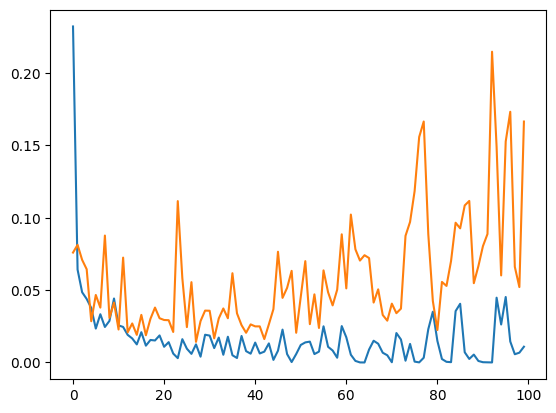

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

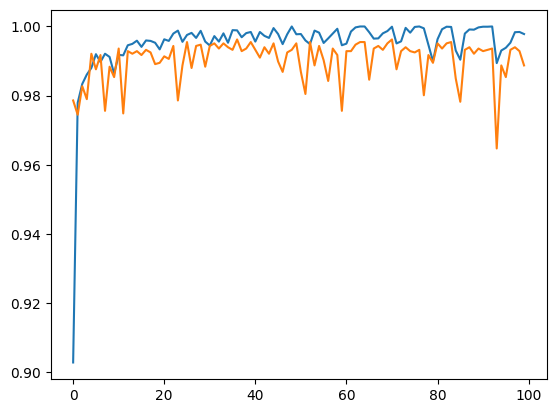

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

1/1 [==============================] - 0s 20ms/step


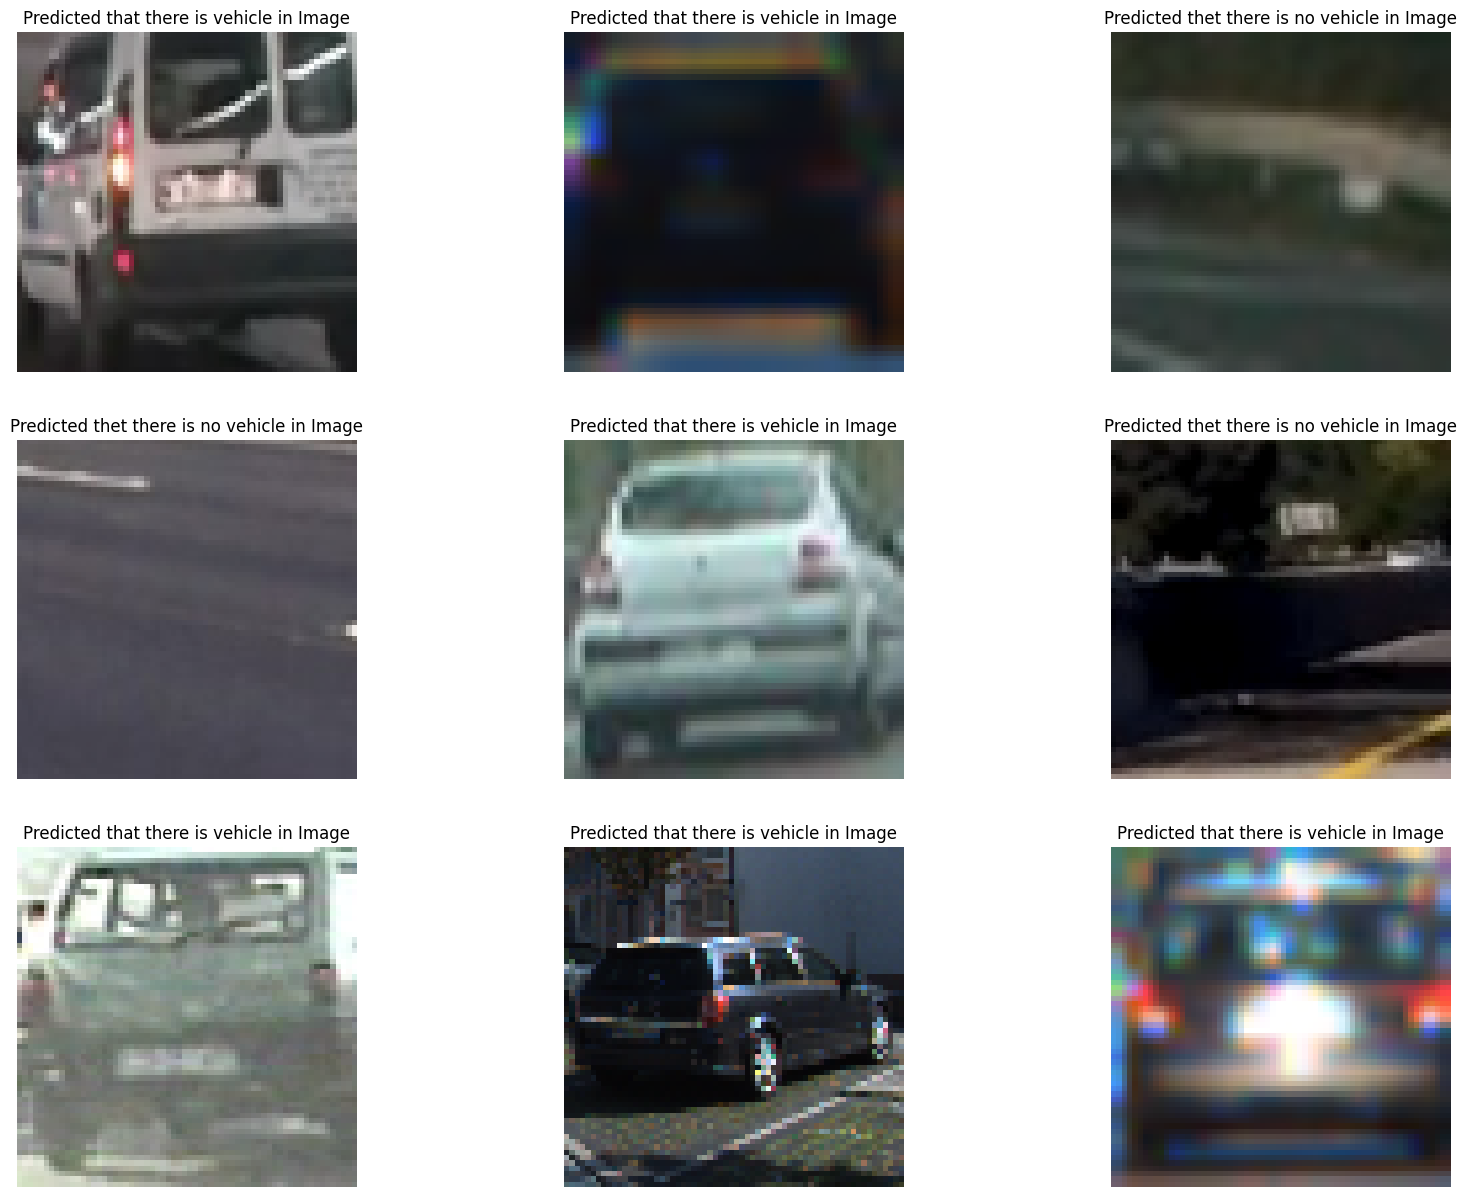

In [ ]:
plt.figure(figsize=(20,15))
for i in range(30):
    plt.subplot(3,3,(i%9)+1)
    rd_idx=np.random.randint(700)
    pred_test=model.predict(np.reshape(test_img[rd_idx],(-1,64,64,3)))
    if pred_test==1:
        plt.title('Predicted that there is vehicle in Image')
    else:
        plt.title('Predicted thet there is no vehicle in Image')
    plt.axis('off')
    plt.imshow(test_img[rd_idx])
plt.show()


In [ ]:
model.save('/content/data/mymodel.h5')

In [ ]:
from keras.saving.saving_lib import load_model
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing import image
import keras.utils as image

# Load the trained model
model = tf.keras.models.load_model('/content/data/mymodel.h5')

# Function to preprocess the input image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image
    return img

# Function to classify the image
def classify_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    if prediction[0][0] >= 0.5:
        return "Vehicle"
    else:
        return "Non-Vehicle"

# Provide the path to the image you want to test
image_path = "/content/data/vehicles/1.png"

# Classify the image
result = classify_image(image_path)
print("Image classification result:", result)

1/1 [==============================] - 0s 92ms/step
Image classification result: Vehicle
